In [10]:
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import numpy as np
import random
import math

X_train, y_train = load_svmlight_file("C:\\Users\\Administrator\\Desktop\\a9a.txt")
X_test, y_test = load_svmlight_file("C:\\Users\\Administrator\\Desktop\\a9a.t")
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=42)

In [11]:
X_train = X_train.toarray()
X_test = X_test.toarray()

X_train = np.array(X_train)
X_test = np.array(X_test)

X_train = np.column_stack((X_train, np.ones(X_train.shape[0])))
X_test = np.column_stack((X_test, np.zeros(X_test.shape[0])))
X_test = np.column_stack((X_test, np.ones(X_test.shape[0])))

y_train = np.array(y_train).reshape(y_train.shape[0],1)
y_test = np.array(y_test).reshape(y_test.shape[0],1)

In [12]:
C = 0.9

def loss (X, W, y):
    ret = 0
    tmp = X.dot(W) * y
    for i in range(0,tmp.shape[0]):
        if tmp[i][0] < 1 :
            ret += 1 - tmp[i][0]
    global C
    ret *= C
    ret += ((W * W).sum() - W[W.shape[0]-1][0] * W[W.shape[0]-1][0]) / 2
    return ret / X.shape[0]

In [13]:
def grad (X, W, y):
    tmp = X.dot(W) * y
    X_tmp = []
    y_tmp = []
    for i in range(0,tmp.shape[0]):
        if tmp[i][0] <= 1 :
            X_tmp.append(X[i])
            y_tmp.append(y[i])
    X_tmp = np.array(X_tmp)
    y_tmp = np.array(y_tmp)
    global C
    tmp = X_tmp.T.dot(y_tmp) * C
    ret = W - tmp
    ret[ret.shape[0]-1][0] = -1.0 * C * y_tmp.sum()
    return ret

In [14]:
v = np.zeros((X_train.shape[1], 1))

def NAG (X, W, y):
    gamma = 0.9
    eta = 0.001
    global v
    #print(v)
    g = grad(X, W - gamma * v, y)
    v = gamma * v + eta * g
    return v

In [15]:
G1 = np.zeros((X_train.shape[1], 1))

def RMSProp (X, W, y):
    g = grad(X, W, y)
    global G1
    gamma = 0.9
    eta = 0.001
    G1 = gamma * G1 + (1.0 - gamma) * np.square(g)
    return (eta / np.sqrt(G1 + 1e-8)) * g

In [16]:
G2 = np.zeros((X_train.shape[1], 1))
delta = np.zeros((X_train.shape[1], 1))

def AdaDelta (X, W, y):
    g = grad(X, W, y)
    global G2
    global delta
    gamma = 0.95
    G2 = gamma * G2 + (1.0 - gamma) * np.square(g)
    ret = (np.sqrt(delta + 1e-8) / np.sqrt(G2 + 1e-8)) * g
    delta = gamma * delta + (1.0 - gamma) * ret * ret
    return ret

In [17]:
G3 = np.zeros((X_train.shape[1], 1))
mt = np.zeros((X_train.shape[1], 1))
t = 0
eta = 0.01

def Adam (X, W, y):
    g = grad(X, W, y)
    beta = 0.9
    gamma = 0.999
    eta = 0.001
    global t 
    global G3
    global mt
    #global eta
    t += 1
    #print(t)
    #eta /= math.sqrt(t)
    mt = beta * mt + (1.0 - beta) * g
    G3 = gamma * G3 + (1.0 - gamma) * np.square(g)
    alpha = eta * math.sqrt(1.0 - gamma ** t) / (1.0 - beta ** t)
    return alpha * mt / np.sqrt(G3 + 1e-8)

NAG:
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
NAG: Finish


RMSProp:
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
RMSProp: Finish


AdaDelta:
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
AdaDelta: Finish


Adam:
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100


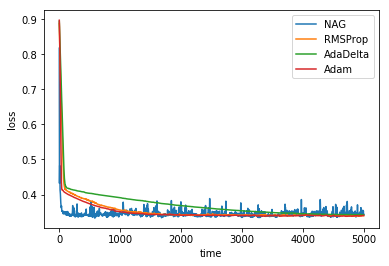

In [19]:
print("NAG:")

W = np.zeros((X_train.shape[1], 1))

time = []
nag = []

for i in range (1, 5001):
    if i%100==0: print(i)
    X_tmp = []
    y_tmp = []
    for j in range(0, 32):
        k = random.randint(0, X_train.shape[0]-1)
        X_tmp.append(X_train[k])
        y_tmp.append(y_train[k])
    D = NAG(np.array(X_tmp), W, np.array(y_tmp))
    W -= D
    time.append(i)
    nag.append(loss(X_test, W, y_test))
    
print("NAG: Finish")
print("")
print("")

print("RMSProp:")

W = np.zeros((X_train.shape[1], 1))

rmsprop = []

for i in range (1, 5001):
    if i%100==0: print(i)
    X_tmp = []
    y_tmp = []
    for j in range(0, 32):
        k = random.randint(0, X_train.shape[0]-1)
        X_tmp.append(X_train[k])
        y_tmp.append(y_train[k])
    D = RMSProp(np.array(X_tmp), W, np.array(y_tmp))
    W -= D
    rmsprop.append(loss(X_test, W, y_test))
    
print("RMSProp: Finish")
print("")
print("")

print("AdaDelta:")

W = np.zeros((X_train.shape[1], 1))

adadelta = []

for i in range (1, 5001):
    if i%100==0: print(i)
    X_tmp = []
    y_tmp = []
    for j in range(0, 32):
        k = random.randint(0, X_train.shape[0]-1)
        X_tmp.append(X_train[k])
        y_tmp.append(y_train[k])
    D = AdaDelta(np.array(X_tmp), W, np.array(y_tmp))
    W -= D
    adadelta.append(loss(X_test, W, y_test))
    
print("AdaDelta: Finish")
print("")
print("")

print("Adam:")

W = np.zeros((X_train.shape[1], 1))

adam = []

for i in range (1, 5001):
    if i%100==0: print(i)
    X_tmp = []
    y_tmp = []
    for j in range(0, 32):
        k = random.randint(0, X_train.shape[0]-1)
        X_tmp.append(X_train[k])
        y_tmp.append(y_train[k])
    D = Adam(np.array(X_tmp), W, np.array(y_tmp))
    W -= D
    adam.append(loss(X_test, W, y_test))
    
print("Adam: Finish")
print("")
print("")


import matplotlib.pyplot as plt

plt.plot(time, nag, label='NAG')
plt.plot(time, rmsprop, label='RMSProp')
plt.plot(time, adadelta, label='AdaDelta')
plt.plot(time, adam, label='Adam')
plt.legend(loc='upper right')
plt.xlabel('time')
plt.ylabel('loss')
plt.show()